## Task 01: 
Use the Multi Segment Simpsons 1/3 rule for finding Integral of the following function within the closed interval of $[0,1]$ and Plot the Relative Absolute Error for the different number of segments. The the integrad is as follows: 
$$ f(x) = 15\sqrt{x^{3}} + 8\sqrt[\leftroot{-1}\uproot{2}\scriptstyle 3]{x^{2}} + x $$


In [5]:
from sympy import sympify, symbols, integrate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 

x = symbols('x')
# original simpsons 1/3 method
def simpsons_one_third(f= None, a = 0, b = 0):  
    #Fixing the values of X
    X = np.array([[a,(a+b)/2,b]]).T
    #Fixing the values of Y
    Y = np.vectorize(lambda t: f.subs(x,t))(X)
    #Taking the powers of X
    X = np.concatenate((X**0,X**1,X**2),axis = 1)
    #Solving for A
    A = np.linalg.inv(X)@Y
    #Substituted values of X after integration stored in b_a
    b_a = np.array([(b-a),(b**2-a**2)/2,(b**3-a**3)/3])
    result = b_a@A
    return float(result)

def simpsons_three_eight(f= None, a = 0, b = 0):
    #setting the value of h
    h = (b-a)/3
    #Fixing the values of X
    X = np.array([[a+i*h for i in range(3+1)]]).T
    #Fixing the values of Y
    Y = np.vectorize(lambda t: f.subs(x,t))(X)
    #Taking the powers of X
    X = np.concatenate(tuple([X**i for i in range(4)]),axis = 1)
    #Solving for A
    A = np.linalg.inv(X)@Y
    #Substituted values of X after integration stored in b_a
    b_a = np.array([(b**i-a**i)/i for i in range(1,5)])
    result = b_a@A
    return float(result)

# multisegment simpsons 1/3 method
def multi_segment_simpsons_one_third(f, a=0, b=0, n=2, verbose = False):
    n = n//2
    h = (b-a)/n
    X = [a+i*h for i in range(n+1)]
    result = 0
    for i in range(n):
        result += simpsons_one_third(f,X[i],X[i+1])
    return result 

# multisegment simpsons 3/8 method
def multi_segment_simpsons_three_eight(f, a=0, b=0, n=3, verbose = False):
    n = n//3
    h = (b-a)/n
    X = [a+i*h for i in range(n+1)]
    result = 0
    for i in range(n):
        result += simpsons_three_eight(f,X[i],X[i+1])
    return result 

def combined_simpsons(f, a=0, b=0, n=5, verbose = False):
    n = n//5
    h = (b-a)/n
    X = [a+i*h for i in range(n+1)]
    result = 0
    for i in range(n):
        s = (X[i+1]-X[i])/5*2
        result += simpsons_one_third(f,X[i],X[i]+s)
        result += simpsons_three_eight(f,X[i]+s,X[i+1])
    return result 

In [6]:
def simpsons_13(f= None, a = 0, b = 0):  
    #Fixing the values of X
    X = np.array([[a,(a+b)/2,b]]).T
    #Fixing the values of Y
    Y = np.vectorize(lambda t: f.subs(x,t))(X)
    h = (b-a)/2
    result = h/3 *(Y[0]+4*Y[1]+Y[2])
    return float(result)

def simpsons_38(f= None, a = 0, b = 0):
    #setting the value of h
    h = (b-a)/3
    #Fixing the values of X
    X = np.array([[a+i*h for i in range(3+1)]]).T
    #Fixing the values of Y
    Y = np.vectorize(lambda t: f.subs(x,t))(X)
    result = h*3/8 * (Y[0]+3*Y[1]+3*Y[2]+Y[3])
    return float(result)

def trap(f= None, a = 0, b = 0):
    fa = f.subs(x,a)
    fb = f.subs(x,b)
    result = (b-a)/2*(fa+fb)
    return float(result)

In [7]:
f = '-9.1688*10**-6*x**3+2.7961*10**-3*x**2-2.8487*10**-1*x+9.6778'
[a,b] = [0,100] 
f = sympify(f)
print(f'Numerical Prediction with simpsons 1/3 rule: {simpsons_13(f, a= a, b = b)}')

Numerical Prediction with simpsons 1/3 rule: 246.24333333333337


# Input Parameters

In [4]:
# Testing Stub
f = '15*(x^(1.5)) + 8*(x ^(0.6666667)) + x'
[a,b] = [0,1] 
f = sympify(f)
print(f'Given Integrad: {f}')
integral_f = integrate(f, x)
print(f'Original Integration: {integral_f}')
original_value = integral_f.subs(x, 1)- integral_f.subs(x, 0)
print('Original Result:', original_value) 
print(f'Numerical Prediction with simpsons 1/3 rule: {simpsons_one_third(f, a= 0, b = 1)}')
print(f'Numerical Prediction with multiple segment simpsons 1/3 rule: {multi_segment_simpsons_one_third(f, a= 0, b = 1, n= 16, verbose = False)}')
print(f'Numerical Prediction with simpsons 3/8 rule: {simpsons_three_eight(f, a= 0, b = 1)}')
print(f'Numerical Prediction with multiple segment simpsons 3/8 rule: {multi_segment_simpsons_three_eight(f, a= 0, b = 1, n= 15, verbose = False)}')
print(f'Numerical Prediction with combined simpsons rule: {combined_simpsons(f, a= 0, b = 1, n= 15, verbose = False)}')


NameError: name 'sympify' is not defined

# Error Calculation:

In [89]:
errors_one_third = []
errors_three_eight = []
errors_combined = []
n_value_one_third = []
n_value_three_eight = []
n_value_combined = []
for i in range(2, 61, 2):
    errors_one_third.append((original_value - multi_segment_simpsons_one_third(f, a= 0, b = 1, n= i, verbose = False))/original_value*100)
    n_value_one_third.append(i)

for i in range(3, 61, 3):
    errors_three_eight.append((original_value - multi_segment_simpsons_three_eight(f, a= 0, b = 1, n= i, verbose = False))/original_value*100)
    n_value_three_eight.append(i)

for i in range(5, 61, 5):
    errors_combined.append((original_value - combined_simpsons(f, a= 0, b = 1, n= i, verbose = False))/original_value*100)
    n_value_combined.append(i)



# Error Plotting

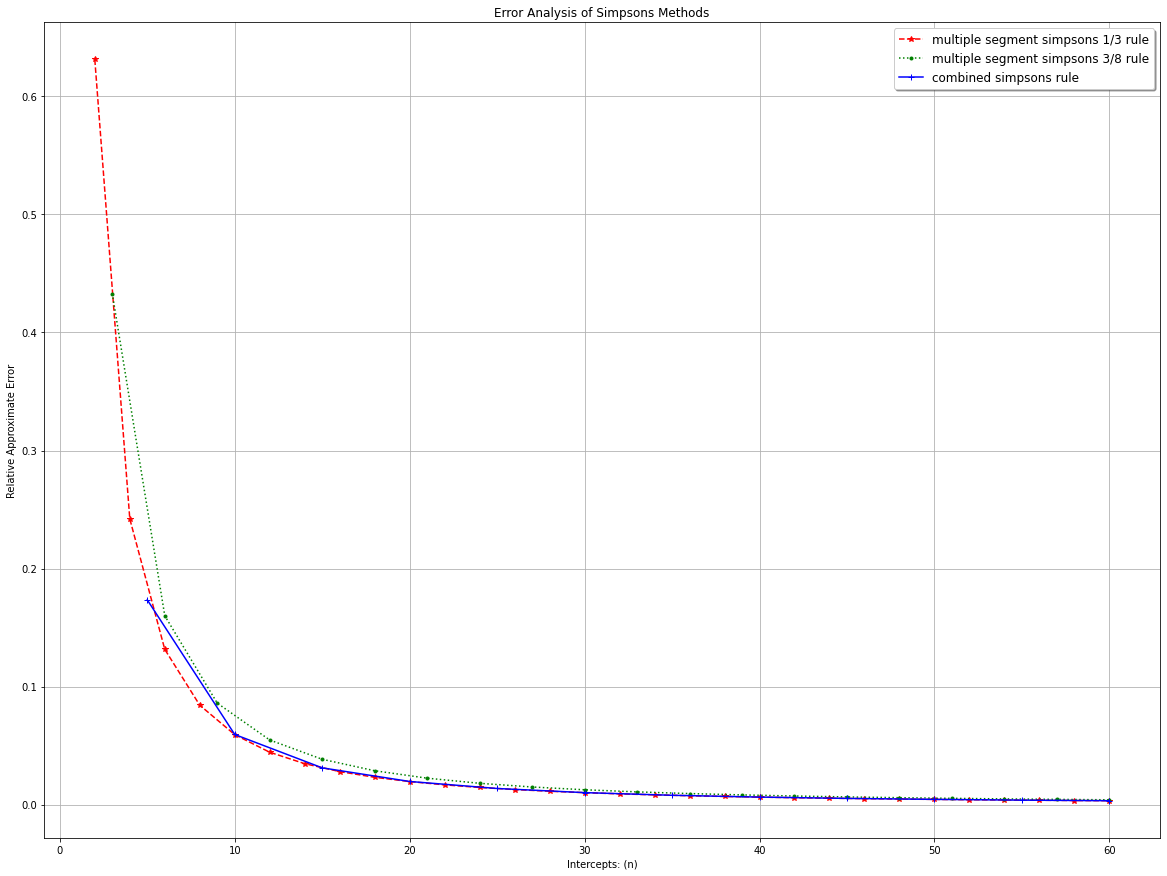

In [90]:
plt.Figure(facecolor='black', linewidth=2)
plt.rcParams["figure.figsize"] = (20,15)
# plt.plot(n_value, errors, 'r-*', markercolor = 'b')
#plt.plot(n_value, errors, color='red', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=10)
plt.plot(n_value_one_third, errors_one_third, "k--", label="multiple segment simpsons 1/3 rule",marker='*',color='red')
plt.plot(n_value_three_eight, errors_three_eight, "k:", label="multiple segment simpsons 3/8 rule",marker='.',color='green')
plt.plot(n_value_combined, errors_combined, "k", label="combined simpsons rule",marker='+',color='blue')
plt.grid(axis = 'both')
plt.xlabel('Intercepts: (n)')
plt.ylabel('Relative Approximate Error')
plt.title('Error Analysis of Simpsons Methods')
plt.legend(loc="upper right", shadow=True, fontsize="large")
plt.show()

In [ ]:
f = '15*(x^(1.5)) + 8*(x ^(0.6666667)) + x'
